In [2]:
# import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# define independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,360,3)])

In [4]:
# set seed for reproducability 
np.random.seed(10)

In [5]:
# define the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [6]:
# create the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [7]:
# print first 5 rows of the data
data.head()

,x,y
0,1.047198,1.065763
1,1.099557,0.998298
2,1.151917,0.681735
3,1.204277,0.932323
4,1.256637,1.044257


In [8]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16): # power of 1 is already there, hence starting with 2
    col_name = 'x_%d'%i # new var will be x_power
    data[col_name] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.099557,0.998298,1.209027,1.329394,1.461745,1.607273,1.767289,1.943235,2.136699,2.349423,2.583326,2.840515,3.123309,3.434258,3.776164,4.152109
2,1.151917,0.681735,1.326913,1.528495,1.760699,2.028180,2.336296,2.691220,3.100062,3.571015,4.113514,4.738429,5.458278,6.287485,7.242662,8.342948
3,1.204277,0.932323,1.450284,1.746543,2.103322,2.532983,3.050414,3.673544,4.423965,5.327680,6.416003,7.726646,9.305024,11.205828,13.494923,16.251628
4,1.256637,1.044257,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450


Split the data to train and test.

In [9]:
data['randNumCol'] = np.random.randint(1,6,data.shape[0])
train = data[data['randNumCol'] <= 3]
test = data[data['randNumCol'] > 3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

Linear Regression

In [13]:
# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [11]:
# separate independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Linear regression with one feature.

Training Error 0.1762071144670913
Testing Error 0.17130060190504406


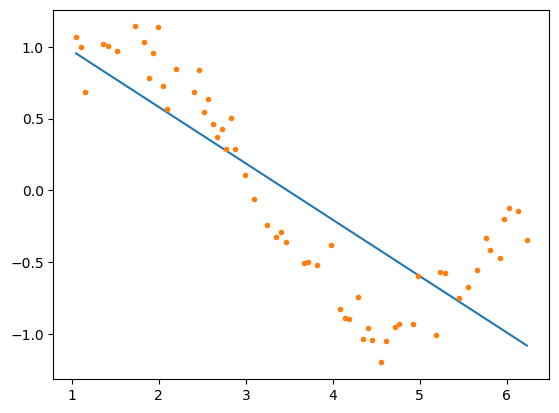

In [14]:
# linear regression with one feature
independent_variable_train = X_train[:,0:1]
independent_variable_test = X_test[:,0:1]

# Apply scaling
scaler = StandardScaler()
independent_variable_train_scaled = scaler.fit_transform(independent_variable_train)
independent_variable_test_scaled = scaler.transform(independent_variable_test)

# Fit the model
linreg = LinearRegression()
linreg.fit(independent_variable_train_scaled, y_train)

# Make predictions
y_train_pred = linreg.predict(independent_variable_train_scaled)
y_test_pred = linreg.predict(independent_variable_test_scaled)

# Calculate RSS
rss_train = sum((y_train_pred-y_train)**2)/X_train.shape[0]
rss_test = sum((y_test_pred-y_test)**2)/X_test.shape[0]

print('Training Error', rss_train)
print('Testing Error', rss_test)

# plot the model
plt.plot(independent_variable_train,y_train_pred)
plt.plot(independent_variable_train,y_train,'.')

Linear regression using three features.

Training Error 0.02606219245176977
Testing Error 0.0237659299448248


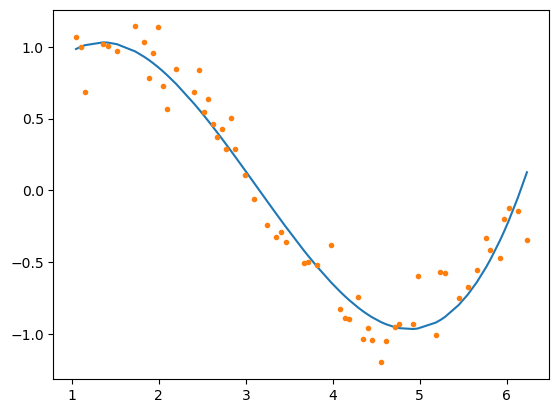

In [20]:
# linear regression with three features
independent_variable_train = X_train[:,0:3]
independent_variable_test = X_test[:,0:3]

# Apply scaling
scaler = StandardScaler()
independent_variable_train_scaled = scaler.fit_transform(independent_variable_train)
independent_variable_test_scaled = scaler.transform(independent_variable_test)

# Fit the model
linreg = LinearRegression()
linreg.fit(independent_variable_train_scaled, y_train)

# Make predictions
y_train_pred = linreg.predict(independent_variable_train_scaled)
y_test_pred = linreg.predict(independent_variable_test_scaled)

# Calculate RSS
rss_train = sum((y_train_pred-y_train)**2)/X_train.shape[0]
rss_test = sum((y_test_pred-y_test)**2)/X_test.shape[0]

print('Training Error', rss_train)
print('Testing Error', rss_test)

# plot the model
plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Data: Slope of line 0.9503551058997243


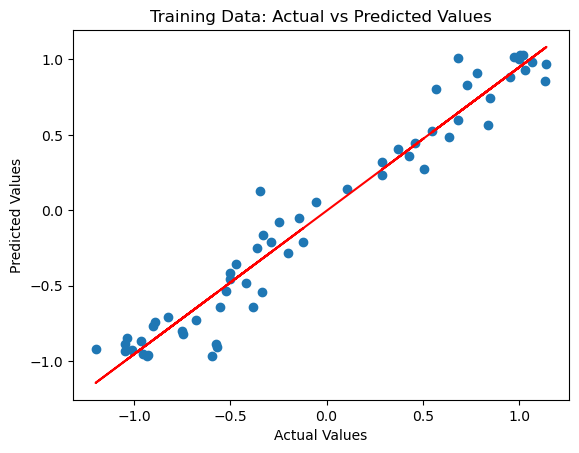

Test Data: Slope of line 0.9104067765954993


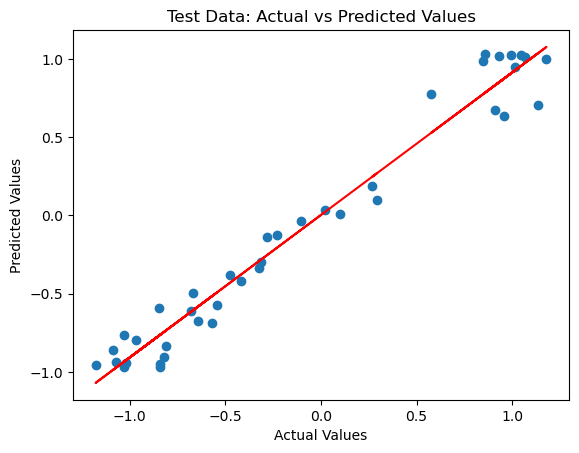

In [21]:
# For training data
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: Actual vs Predicted Values')

# Calculate the line of best fit
slope, intercept = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, slope*y_train + intercept, color='red')  # plot the line of best fit

print('Training Data: Slope of line', slope)

plt.show()

# For test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted Values')

# Calculate the line of best fit
slope, intercept = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, slope*y_test + intercept, color='red')  # plot the line of best fit

print('Test Data: Slope of line', slope)

plt.show()

In [22]:
def linreg_function(train_x, train_y, test_x, test_y, features, models_to_plot):
    # Fit the model
    linreg = LinearRegression()
    linreg.fit(train_x, train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)

    # Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:, :1], train_y, '.')
        plt.plot(train_x[:, :1], train_y_pred)
        plt.title('Number of Predictors: %d' % features)

    # Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret